# Differential Gene Expression Using Scanpy

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
import os
import urllib.request

warnings.simplefilter(action="ignore", category=Warning)

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 2

sc.settings.set_figure_params(dpi=80)

/tmp/ipykernel_3494572/593879911.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read in Data

In [2]:
# download pre-computed data if missing or long compute
fetch_data = True

# url for source and intermediate data
path_data = "https://export.uppmax.uu.se/naiss2023-23-3/workshops/workshop-scrnaseq"

path_results = "data/covid/results"
if not os.path.exists(path_results):
    os.makedirs(path_results, exist_ok=True)

# path_file = "data/covid/results/scanpy_covid_qc_dr_scanorama_cl.h5ad"
path_file = "data/covid/results/scanpy_covid_qc_dr_scanorama_cl.h5ad"
if fetch_data and not os.path.exists(path_file):
    urllib.request.urlretrieve(os.path.join(
        path_data, 'covid/results/scanpy_covid_qc_dr_scanorama_cl.h5ad'), path_file)

adata = sc.read_h5ad(path_file)
adata

AnnData object with n_obs × n_vars = 7222 × 2626
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15', 'hclust_5', 'hclust_10', 'hclust_15'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.6', 'doublet_info_colors', 'hclust_10_colors', 'hclust_15_colors', 'hclust_5_colors', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 

In [3]:
#Use Data in raw (normalized and log transformed)
adata = adata.raw.to_adata()
print(adata.X[:10,:10])

  (1, 4)	0.7825693876867097
  (8, 7)	1.1311041336746985


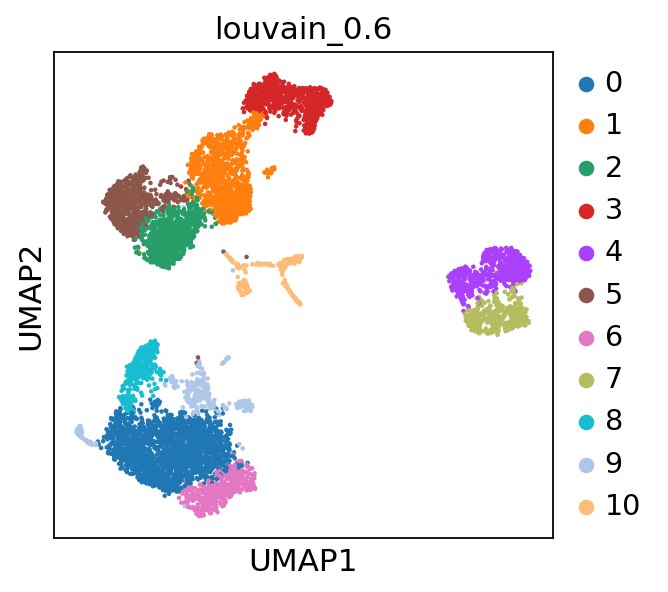

In [4]:
sc.pl.umap(adata,color = 'louvain_0.6')

## Run Differential Expression on Louvain Groups

### T-test

ranking genes
    finished (0:00:01)


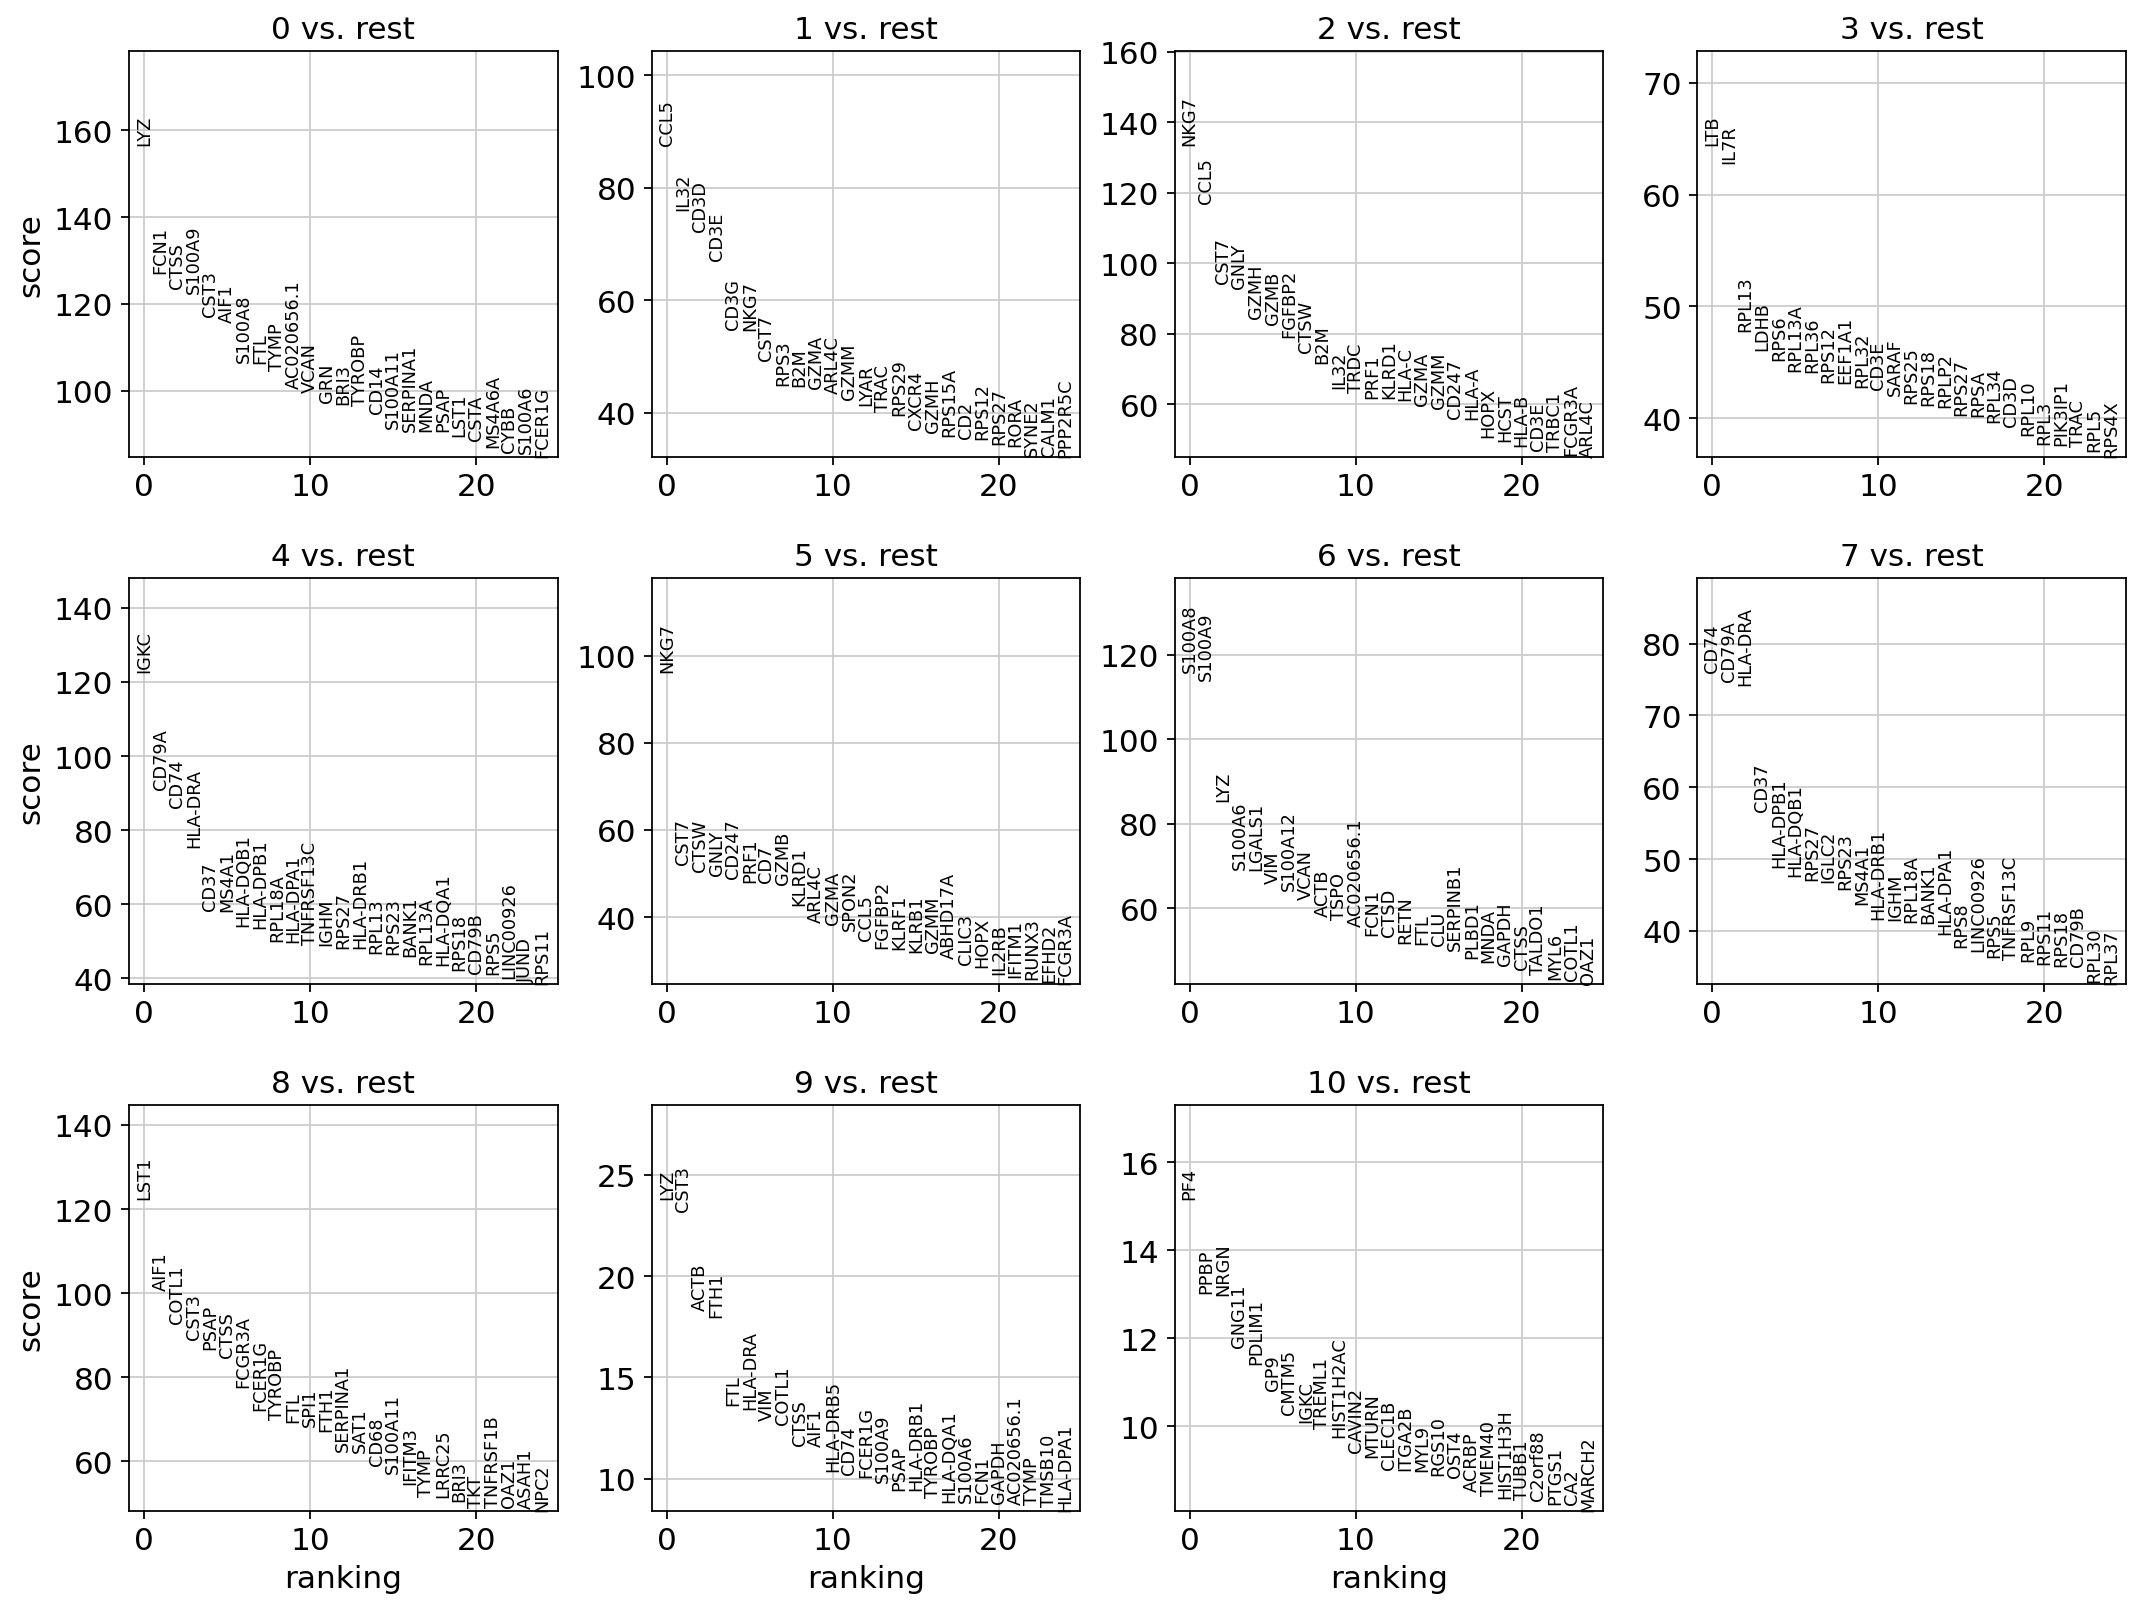

AnnData object with n_obs × n_vars = 7222 × 19468
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15', 'hclust_5', 'hclust_10', 'hclust_15'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.6', 'doublet_info_colors', 'hclust_10_colors', 'hclust_15_colors', 'hclust_5_colors', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 'kmeans5_colors', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden

In [5]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

# results are stored in the adata.uns["t-test"] slot
adata

### T-test overestimated variance

ranking genes
    finished (0:00:01)


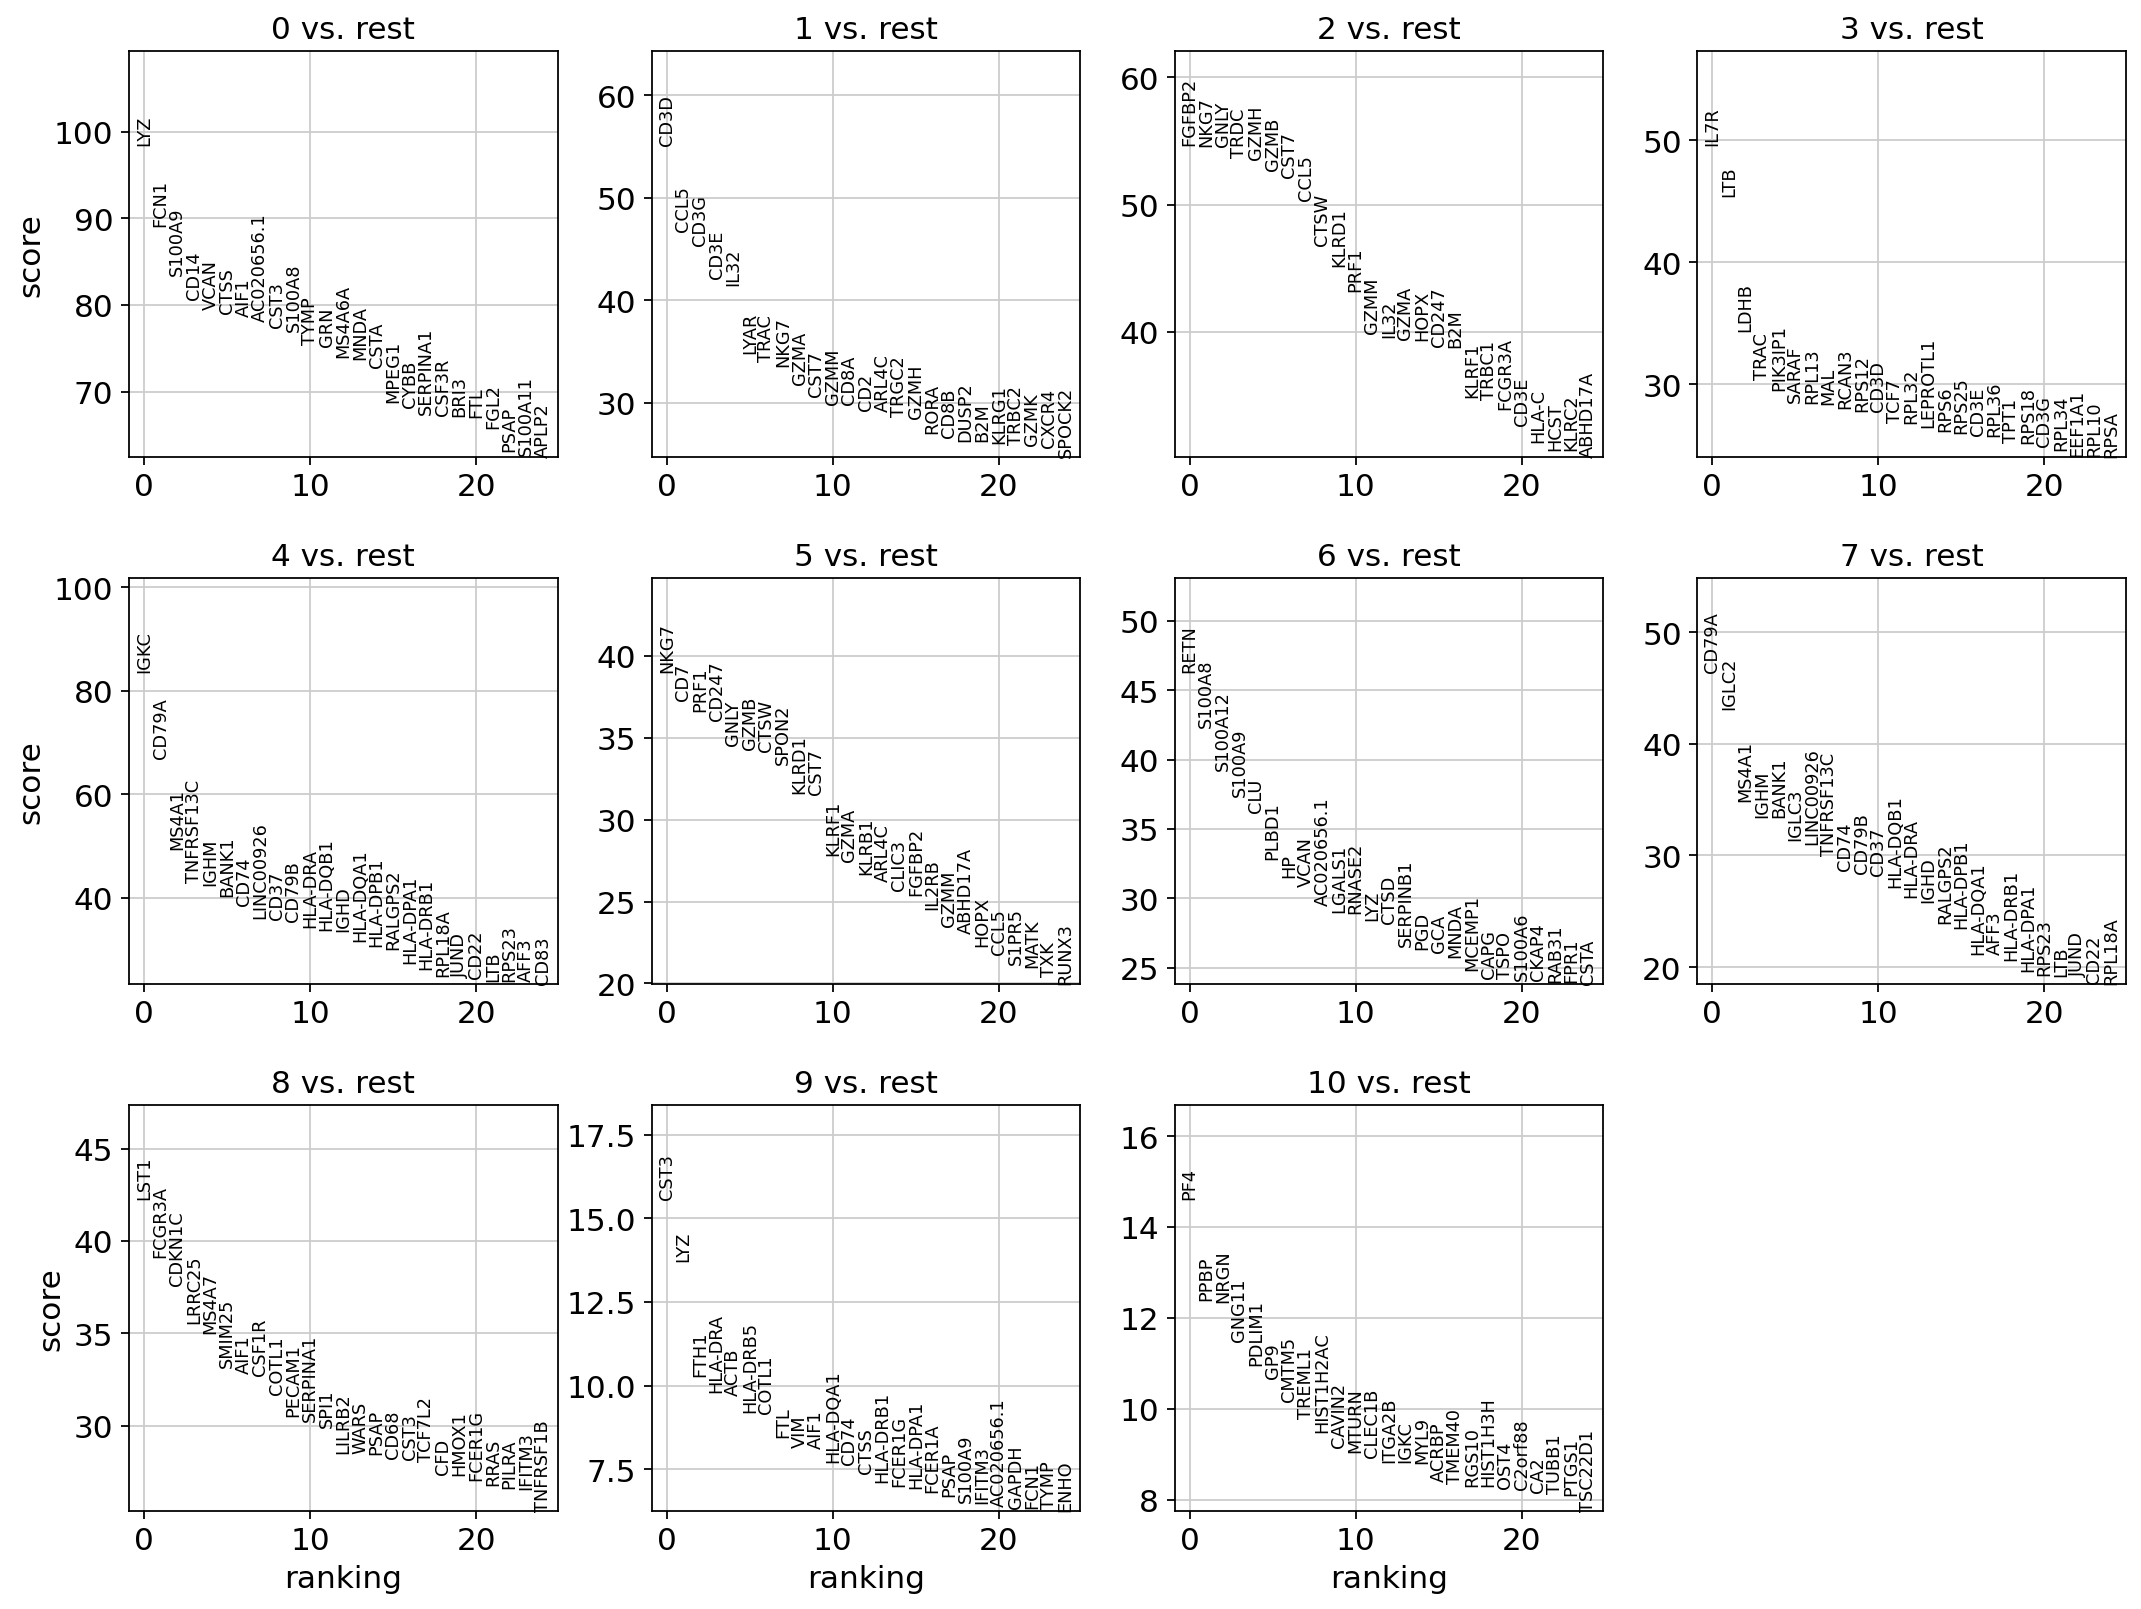

In [6]:

sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test_ov")

### Wilcoxon rank-sum

ranking genes
    finished (0:00:06)


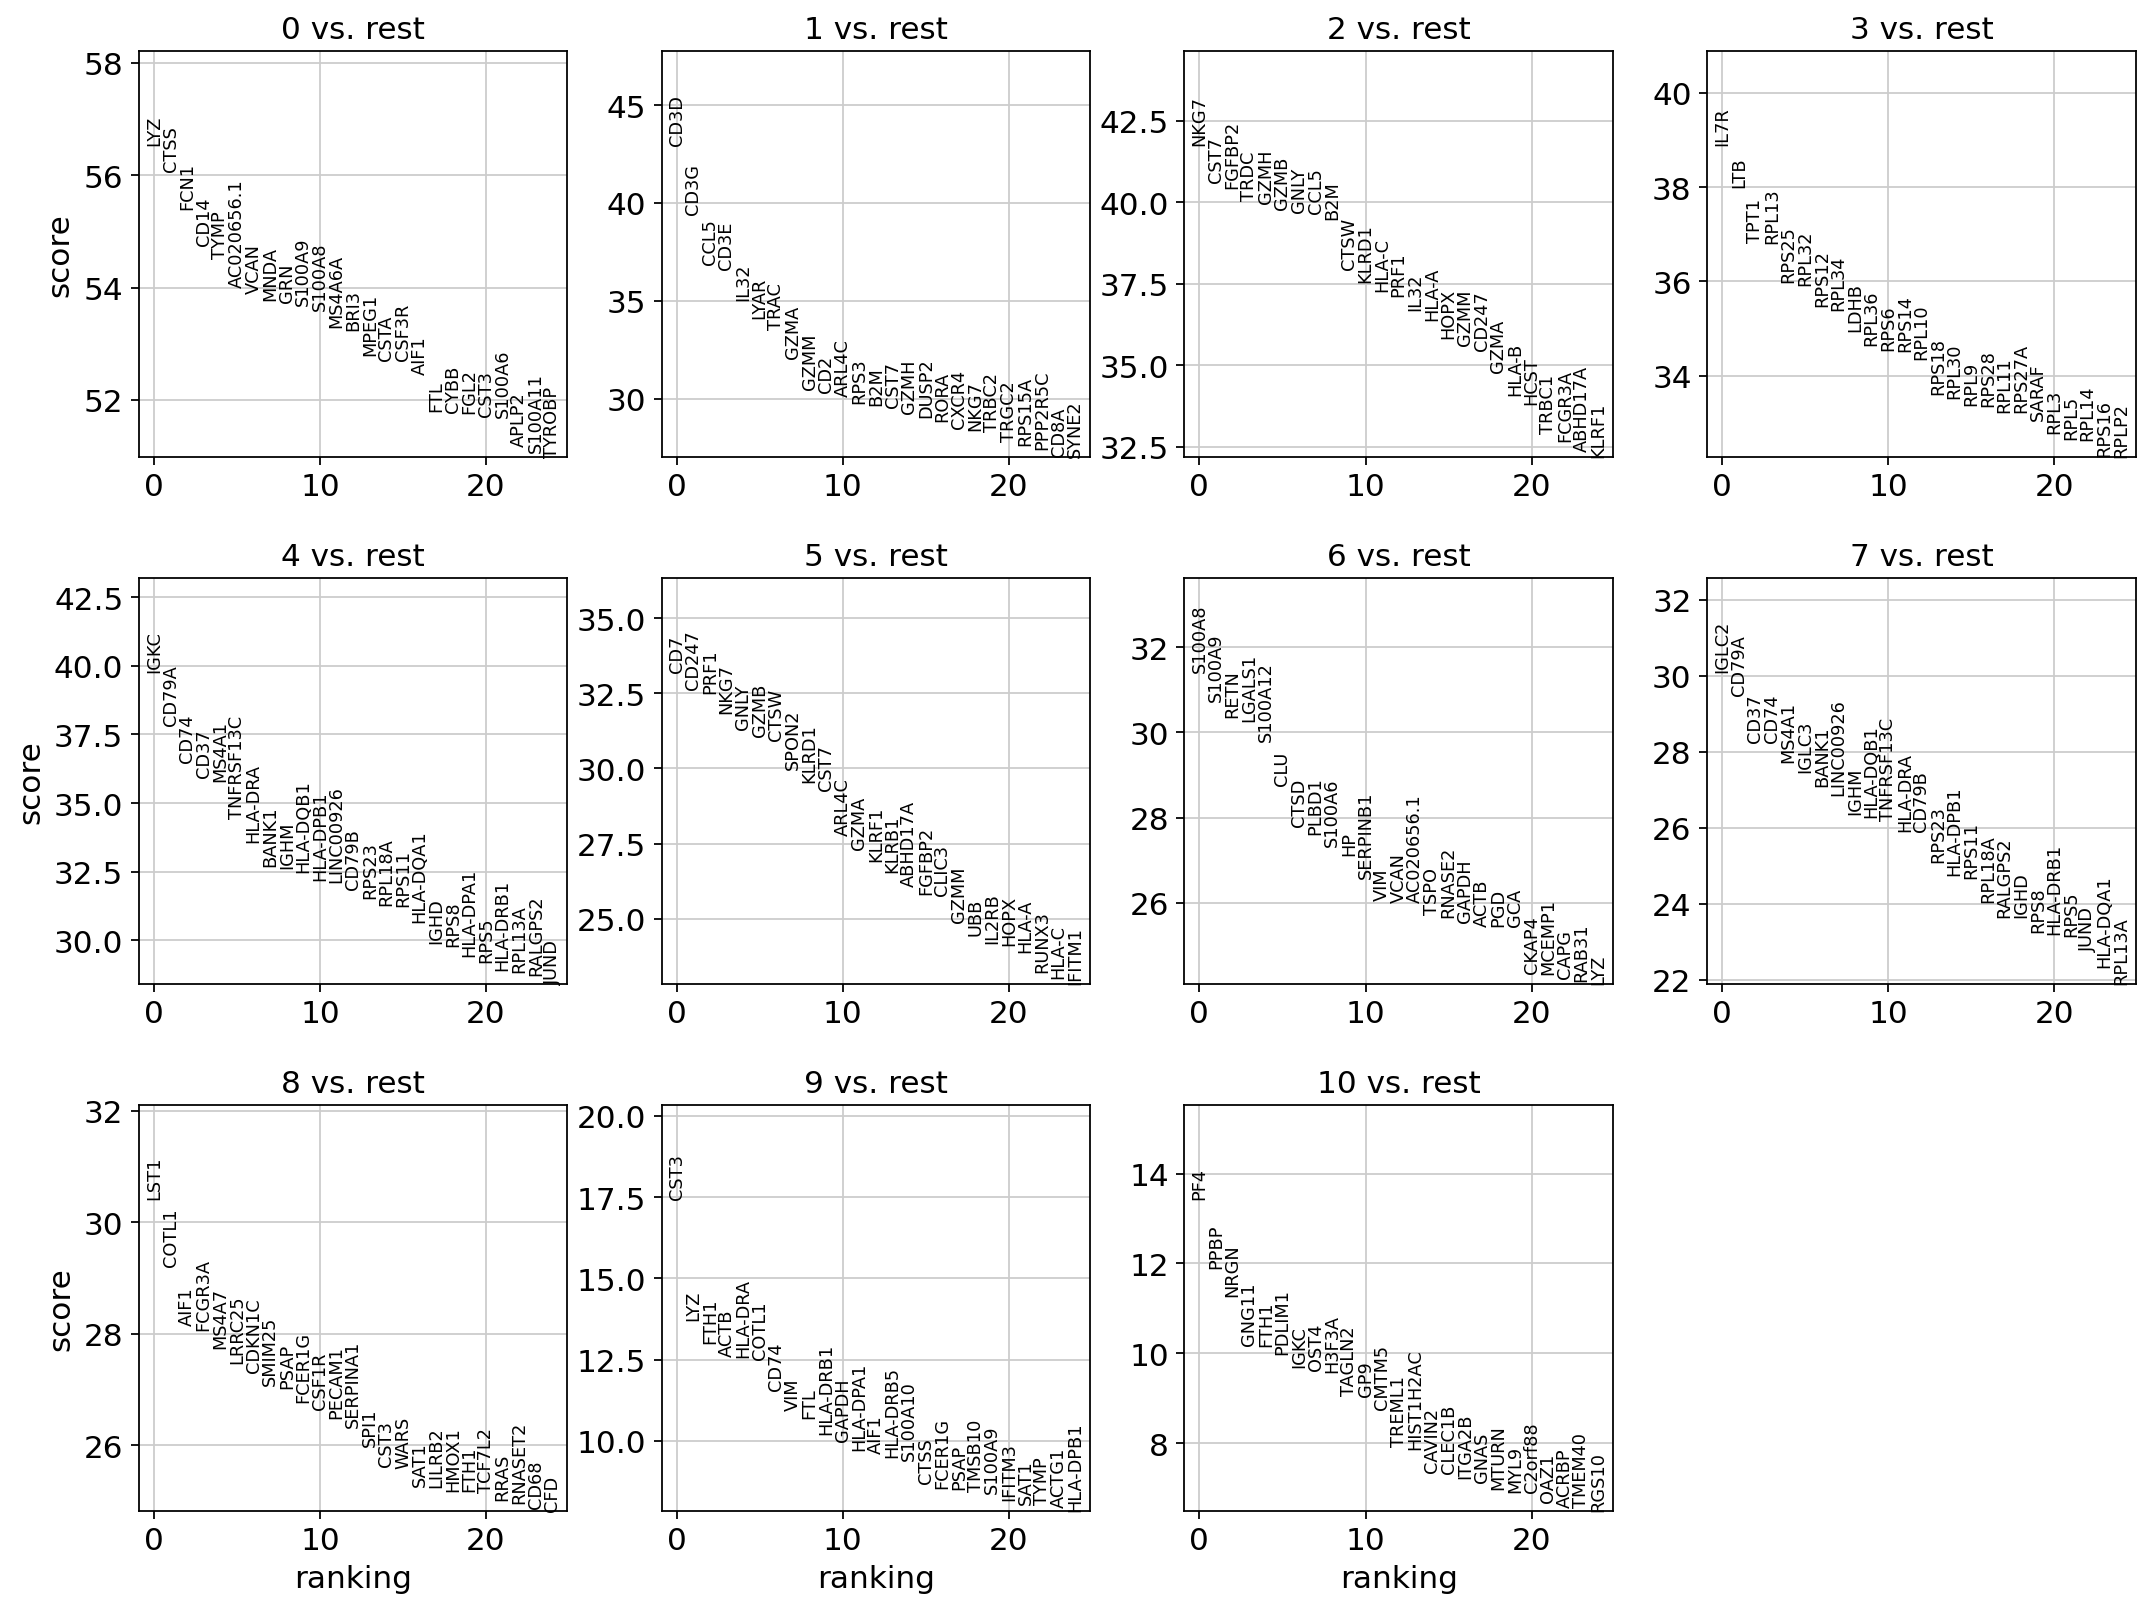

In [7]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

### Logistic Regression Test

ranking genes
    finished (0:00:26)


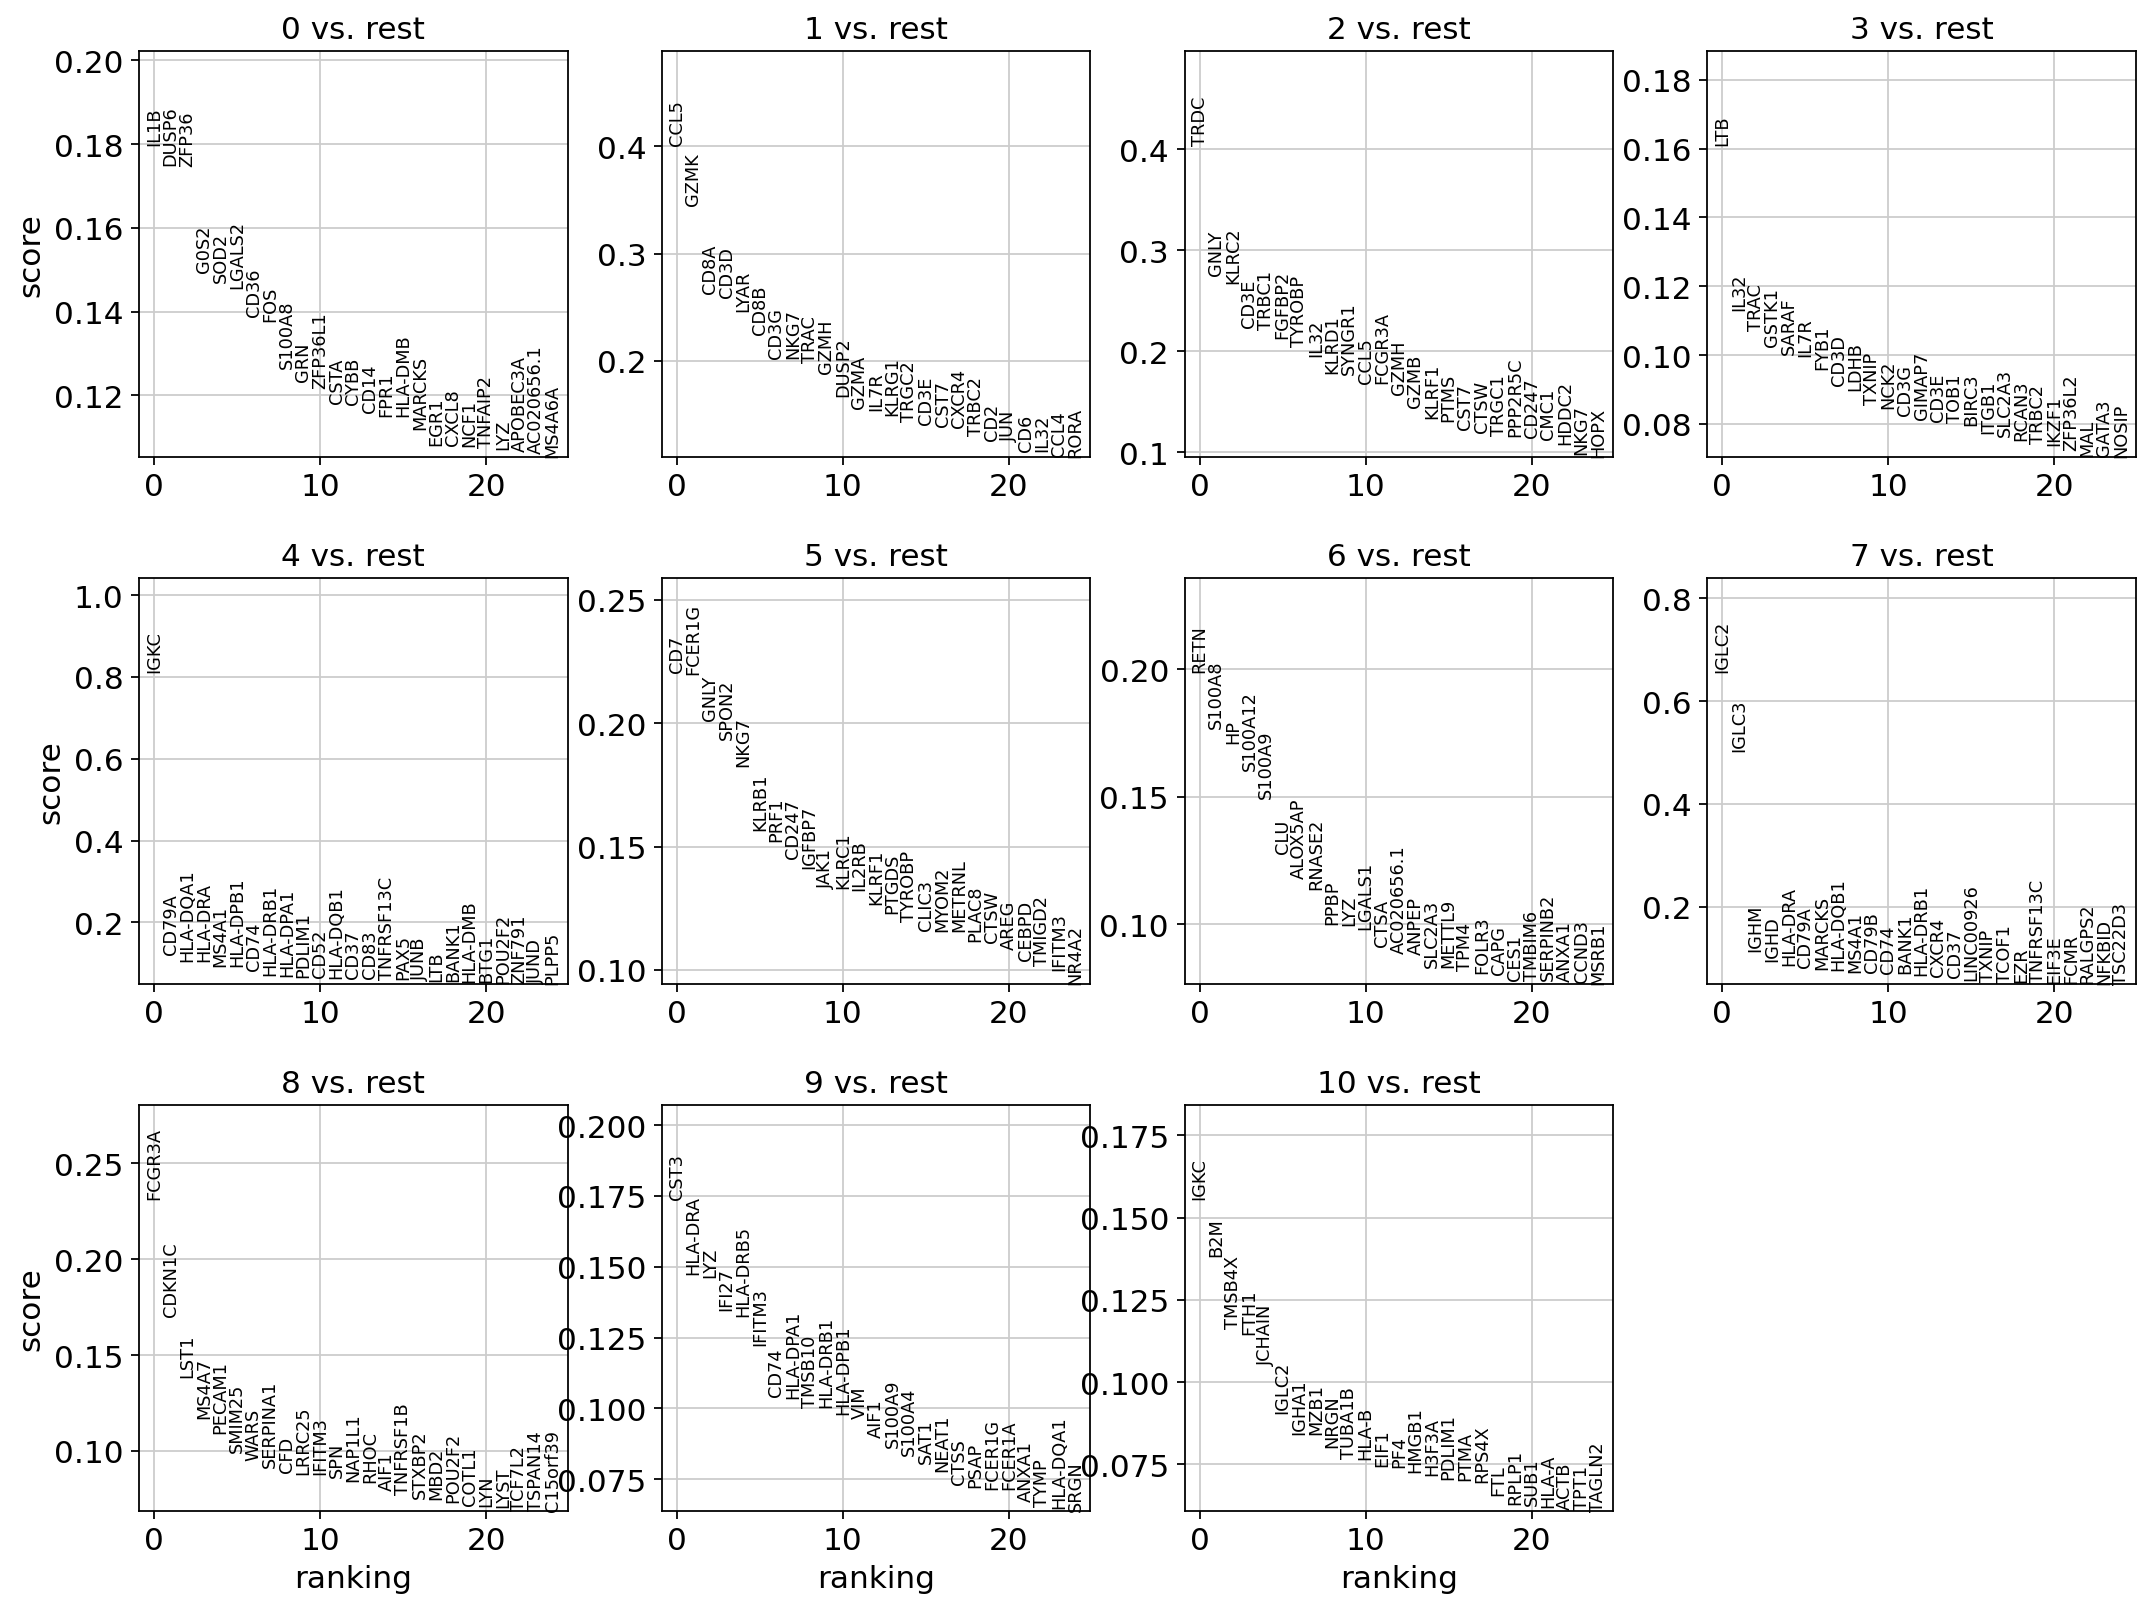

In [8]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='logreg',key_added = "logreg")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "logreg")

### Compare Genes

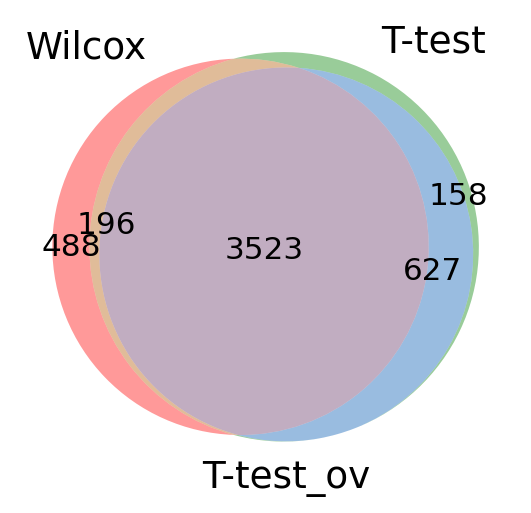

In [12]:
#compare cluster1 genes, only stores top 100 by default

wc = sc.get.rank_genes_groups_df(adata, group='0', key='wilcoxon', pval_cutoff=0.01, log2fc_min=0)['names']
tt = sc.get.rank_genes_groups_df(adata, group='0', key='t-test', pval_cutoff=0.01, log2fc_min=0)['names']
tt_ov = sc.get.rank_genes_groups_df(adata, group='0', key='t-test_ov', pval_cutoff=0.01, log2fc_min=0)['names']

from matplotlib_venn import venn3

venn3([set(wc),set(tt),set(tt_ov)], ('Wilcox','T-test','T-test_ov') )
plt.show()

### Compare Individual Clusters

ranking genes
    finished (0:00:01)


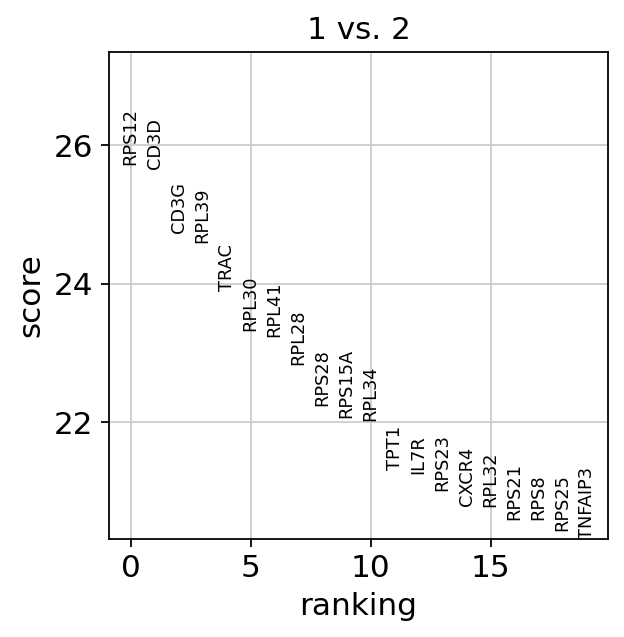

In [13]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', groups=['1'], reference='2', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['1'], n_genes=20)

## Visualize Differential Genes

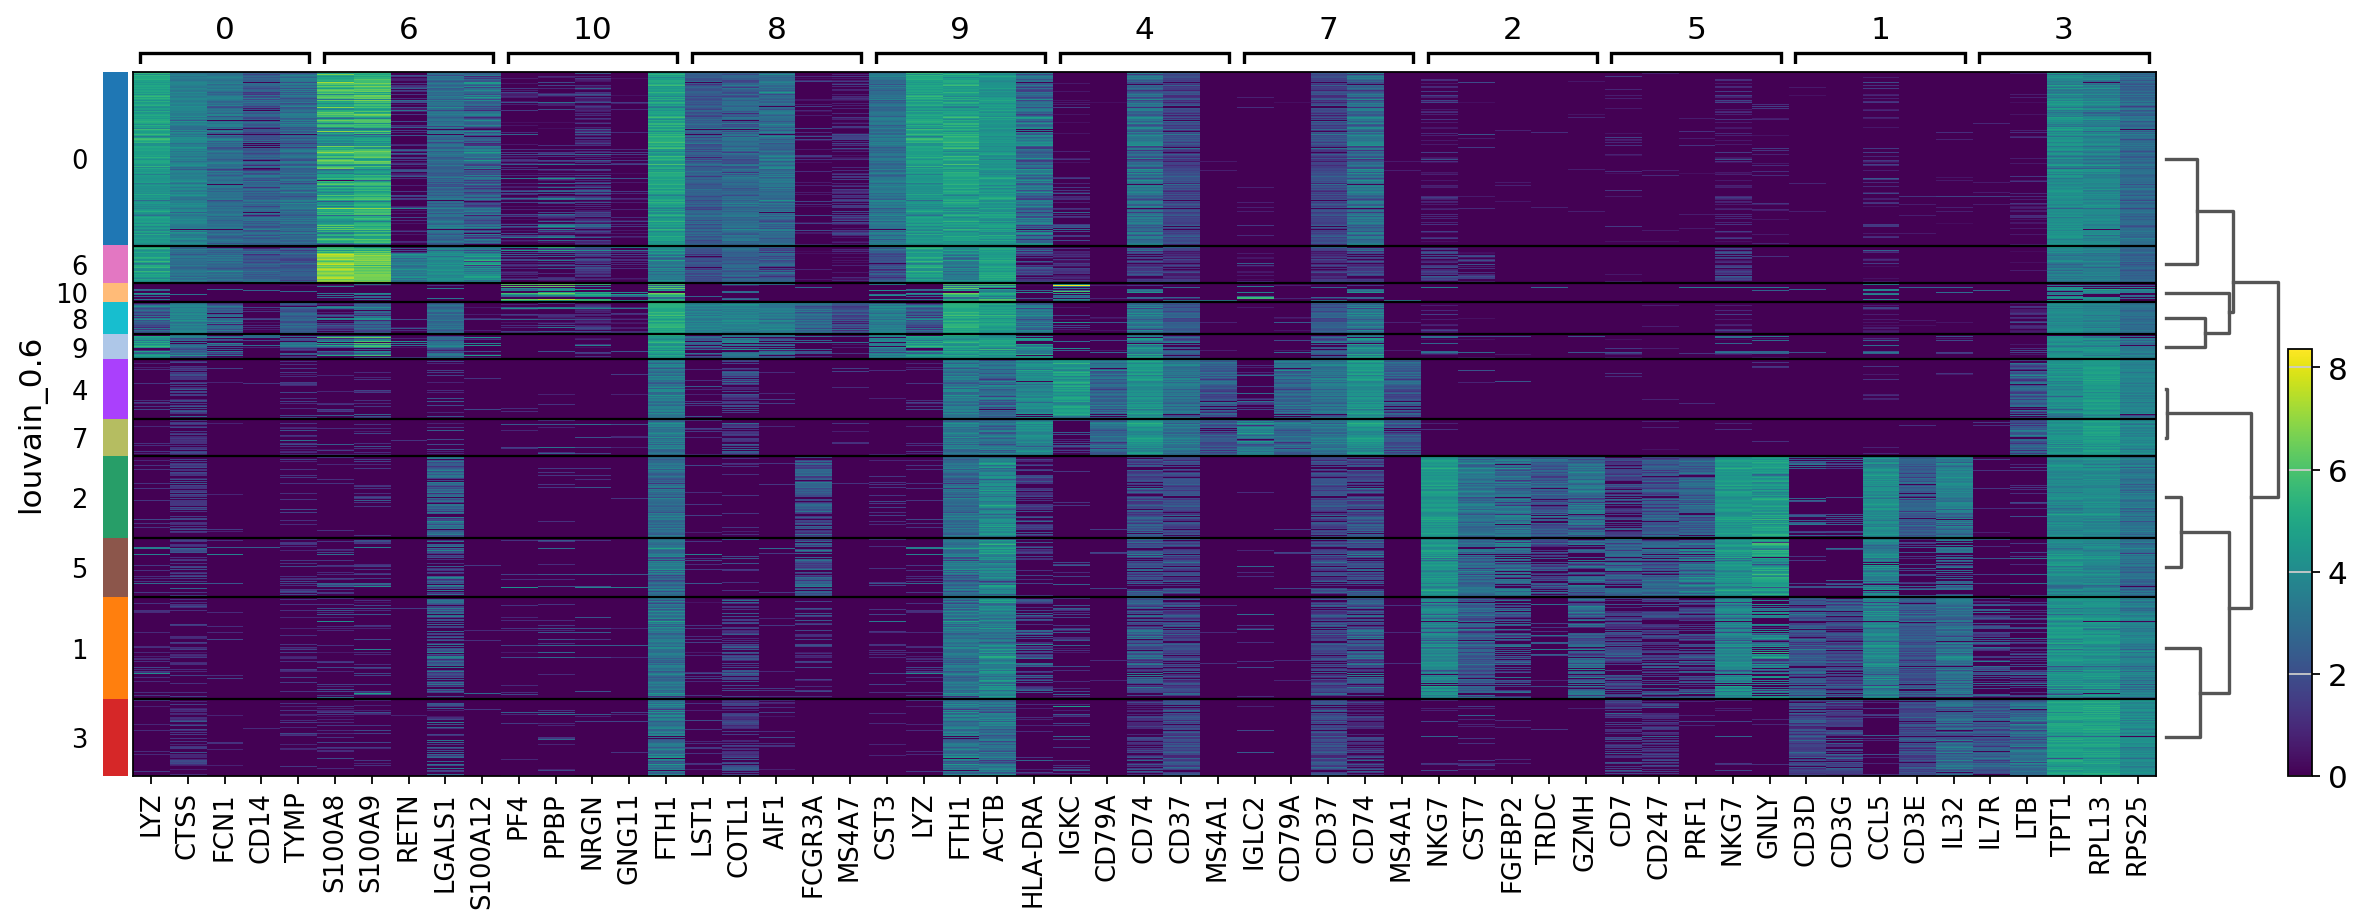

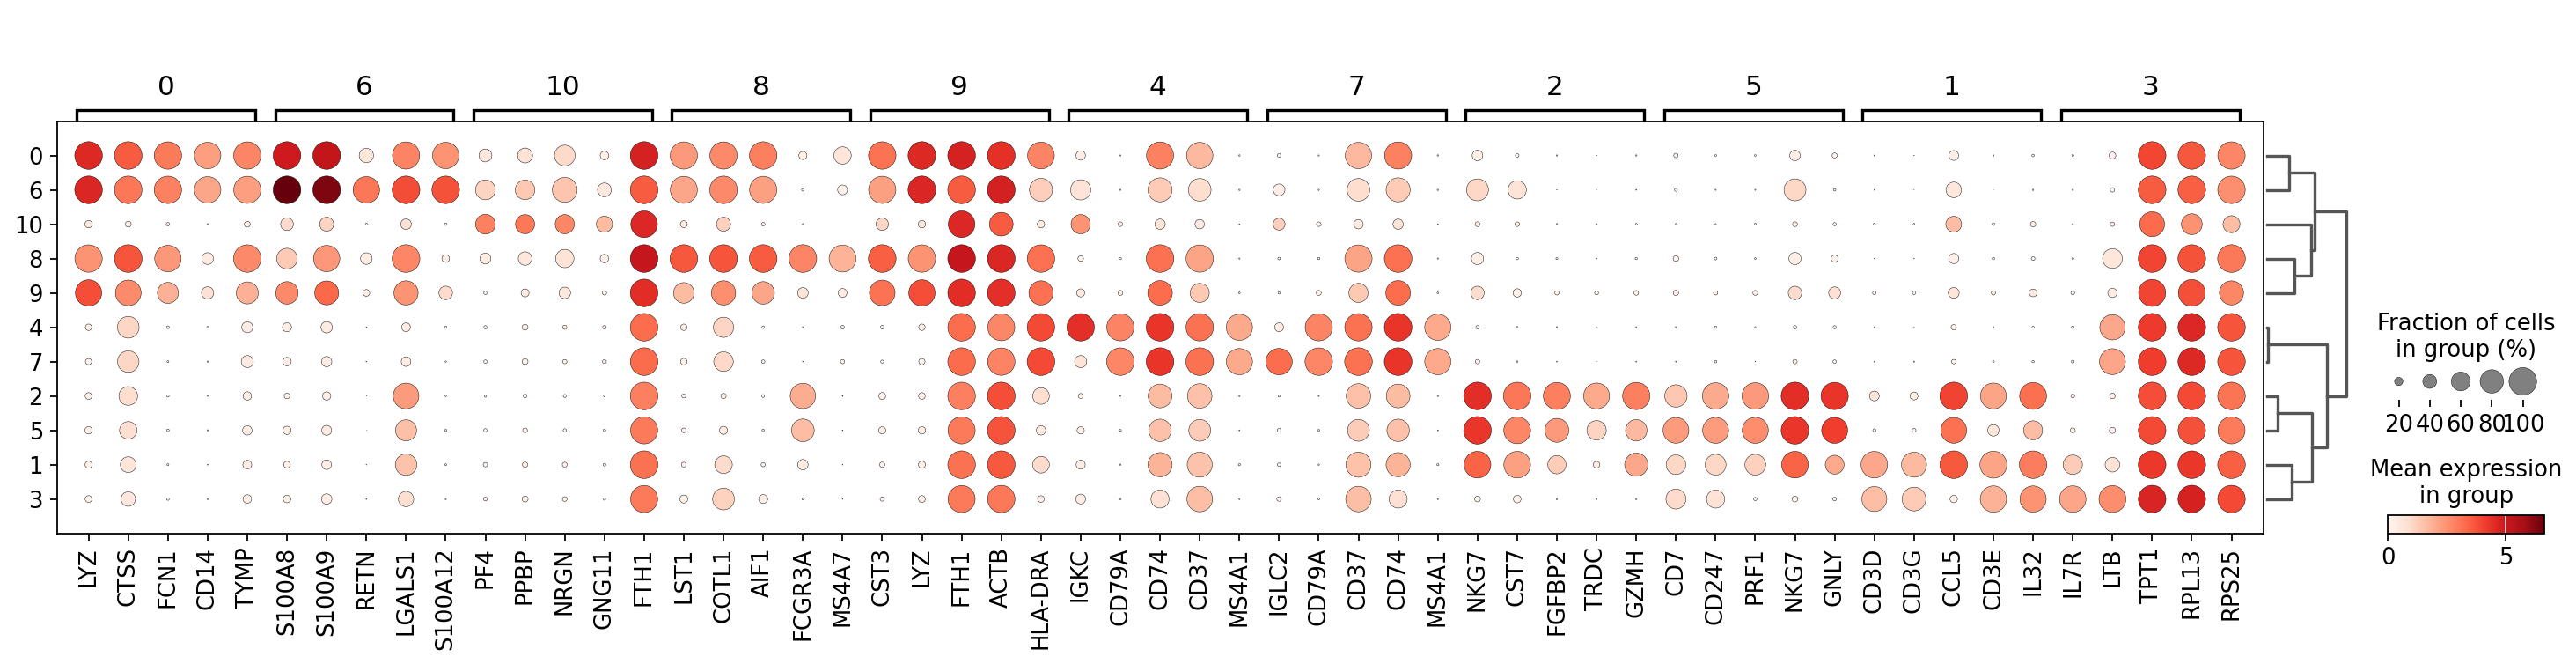

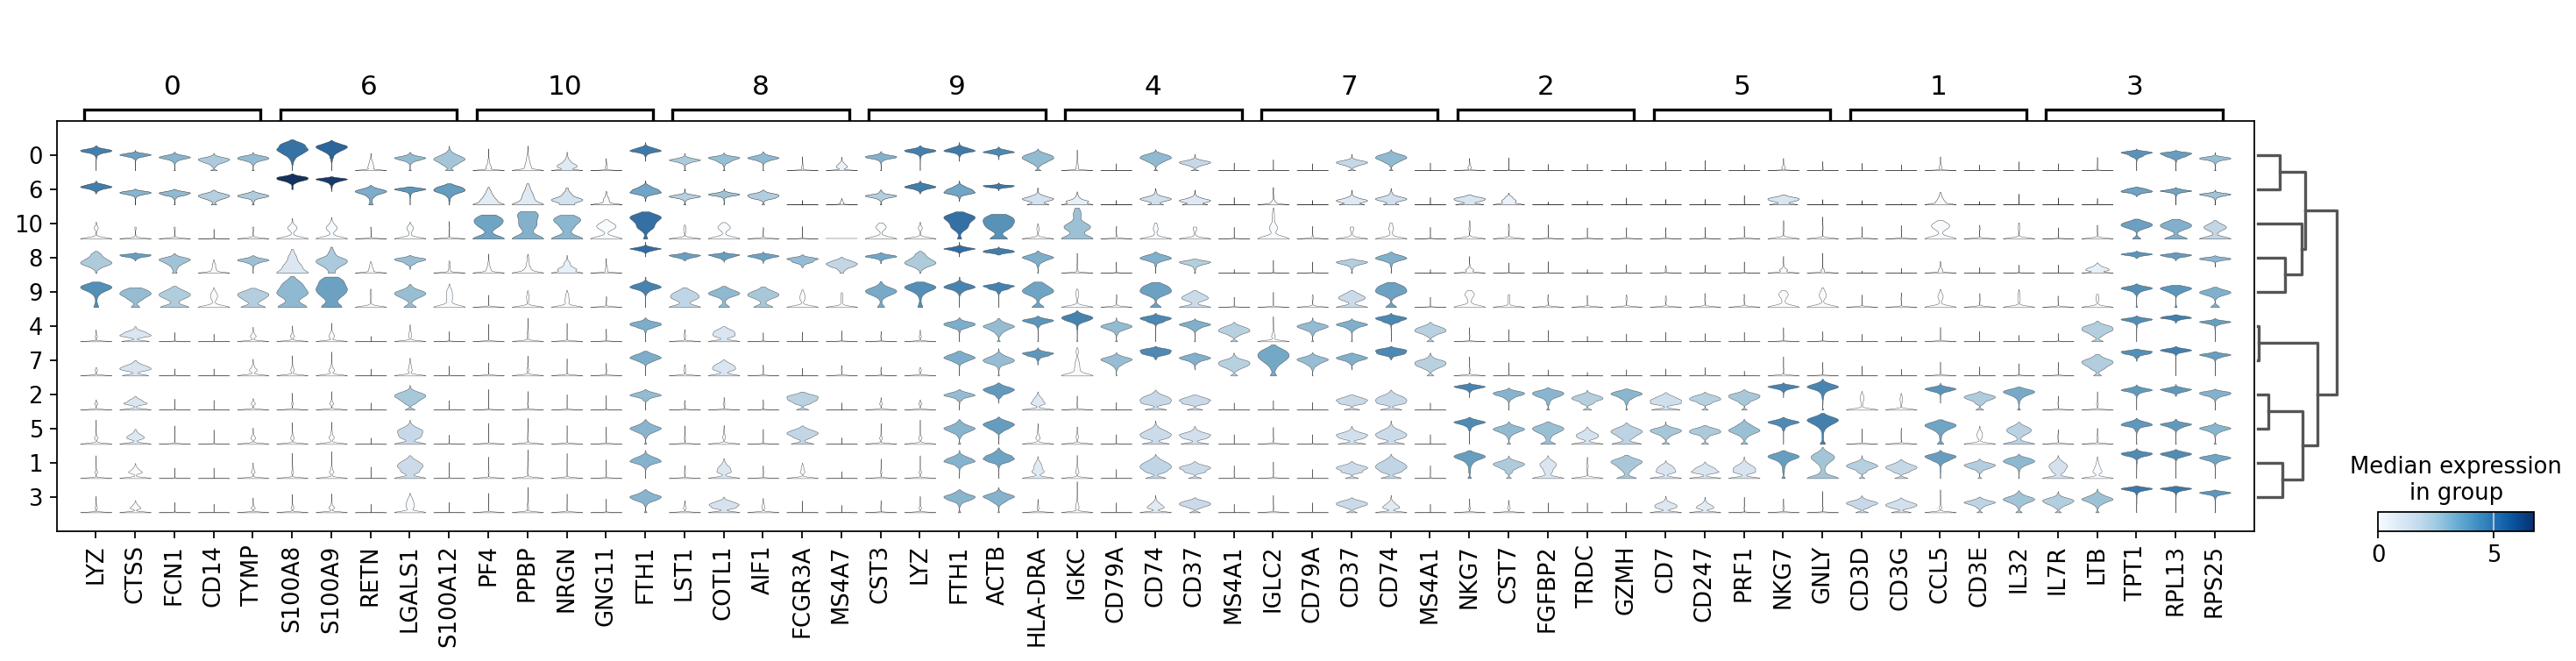

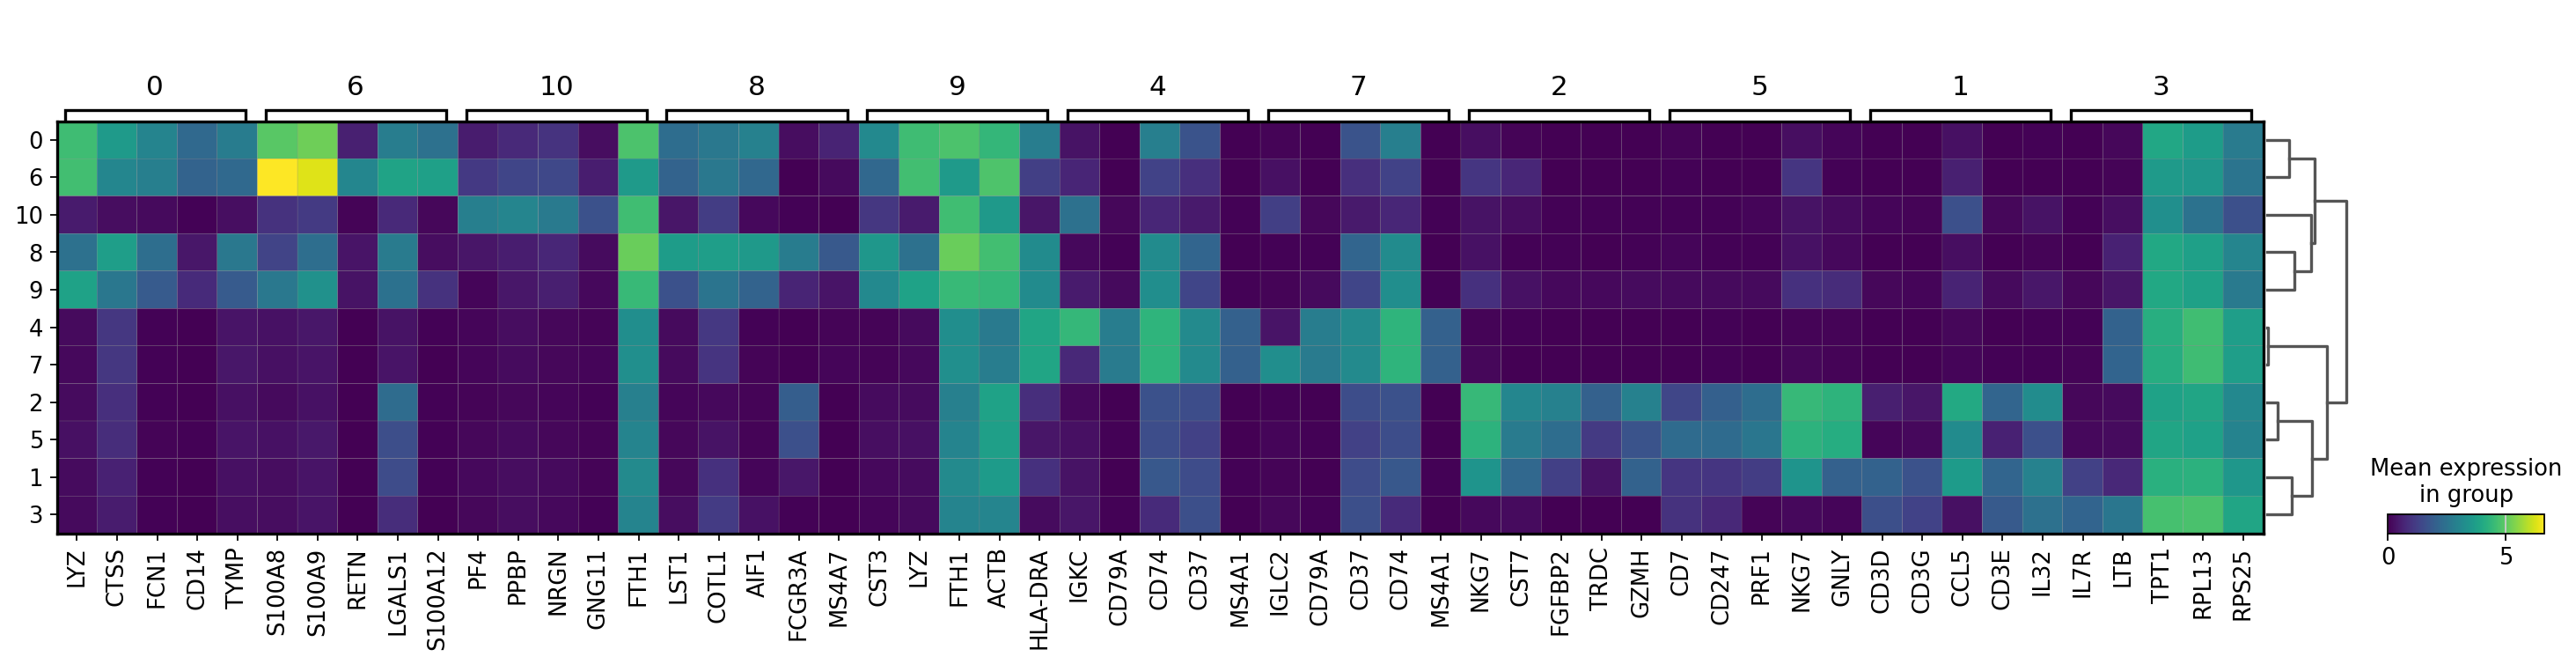

In [14]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6", show_gene_labels=True)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

## Patient Batch Effects

DGE test for 3 vs 3 individuals. That will be very sensitive to sample differences unless we find a way to control for it. So first, lets check how the top DGEs are expressed across the individuals:

In [18]:
cl1.obs

type   sample batch  n_genes_by_counts  total_counts  \
CCCTGATAGCGAACTG-1-0   Covid  covid_1     0               2036        9482.0   
AATAGAGGTGTGAGCA-1-0   Covid  covid_1     0               1285        4736.0   
GGTGTTACACGACGAA-1-0   Covid  covid_1     0               2137        8433.0   
GGTAATCGTGCACATT-1-0   Covid  covid_1     0               1876        7012.0   
GTACAACGTGGTCCGT-1-0   Covid  covid_1     0                888        2515.0   
...                      ...      ...   ...                ...           ...   
GTCAAGTAGGGTAATT-19-7   Ctrl  ctrl_19     7               1910        6967.0   
GCTACAATCTGGCTGG-19-7   Ctrl  ctrl_19     7               1166        3091.0   
GCACATAGTCATCGGC-19-7   Ctrl  ctrl_19     7               1116        2536.0   
AGTGATCCATACAGCT-19-7   Ctrl  ctrl_19     7               2636       11337.0   
TGTCCTGAGGTCATCT-19-7   Ctrl  ctrl_19     7               1481        4771.0   

                       total_counts_mt  pct_counts_mt  total_counts_ribo  \
CCCTGATAGCGAACTG-1-0             761.0       8.025733             4157.0   
AATAGAGGTGTGAGCA-1-0             607.0      12.816723             1689.0   
GGTGTTACACGACGAA-1-0             693.0       8.217716             3259.0   
GGTAATCGTGCACATT-1-0             449.0       6.403309             2682.0   
GTACAACGTGGTCCGT-1-0             300.0      11.928429              979.0   
...                                ...            ...                ...   
GTCAAGTAGGGTAATT-19-7            767.0      11.009043             2318.0   
GCTACAATCTGGCTGG-19-7            304.0       9.835005              883.0   
GCACATAGTCATCGGC-19-7            283.0      11.159306              483.0   
AGTGATCCATACAGCT-19-7           1380.0      12.172532             3857.0   
TGTCCTGAGGTCATCT-19-7            465.0       9.746384             1437.0   

                       pct_counts_ribo  total_counts_hb  ...  louvain_1.0  \
CCCTGATAGCGAACTG-1-0         43.840962              3.0  ...            5   
AATAGAGGTGTGAGCA-1-0         35.663007              5.0  ...            5   
GGTGTTACACGACGAA-1-0         38.645796              2.0  ...            5   
GGTAATCGTGCACATT-1-0         38.248716              0.0  ...            5   
GTACAACGTGGTCCGT-1-0         38.926441              0.0  ...            5   
...                                ...              ...  ...          ...   
GTCAAGTAGGGTAATT-19-7        33.271135              0.0  ...            5   
GCTACAATCTGGCTGG-19-7        28.566807              0.0  ...            5   
GCACATAGTCATCGGC-19-7        19.045741              0.0  ...            5   
AGTGATCCATACAGCT-19-7        34.021346              0.0  ...            5   
TGTCCTGAGGTCATCT-19-7        30.119472              0.0  ...            5   

                       louvain_0.6  louvain_0.4  louvain_1.4  kmeans5  \
CCCTGATAGCGAACTG-1-0             4            3            7        3   
AATAGAGGTGTGAGCA-1-0             4            3           14        3   
GGTGTTACACGACGAA-1-0             4            3           14        3   
GGTAATCGTGCACATT-1-0             4            3            7        3   
GTACAACGTGGTCCGT-1-0             4            3            7        3   
...                            ...          ...          ...      ...   
GTCAAGTAGGGTAATT-19-7            4            3           14        3   
GCTACAATCTGGCTGG-19-7            4            3           14        3   
GCACATAGTCATCGGC-19-7            4            3            7        3   
AGTGATCCATACAGCT-19-7            4            3           14        3   
TGTCCTGAGGTCATCT-19-7            4            3            7        3   

                       kmeans10  kmeans15  hclust_5 hclust_10  hclust_15  
CCCTGATAGCGAACTG-1-0          3         3         2         5          5  
AATAGAGGTGTGAGCA-1-0          3        11         2         5         14  
GGTGTTACACGACGAA-1-0          3         3         2         5         14  
GGTAATCGTGCACATT-1-0          3         3       

ranking genes
    finished (0:00:00)


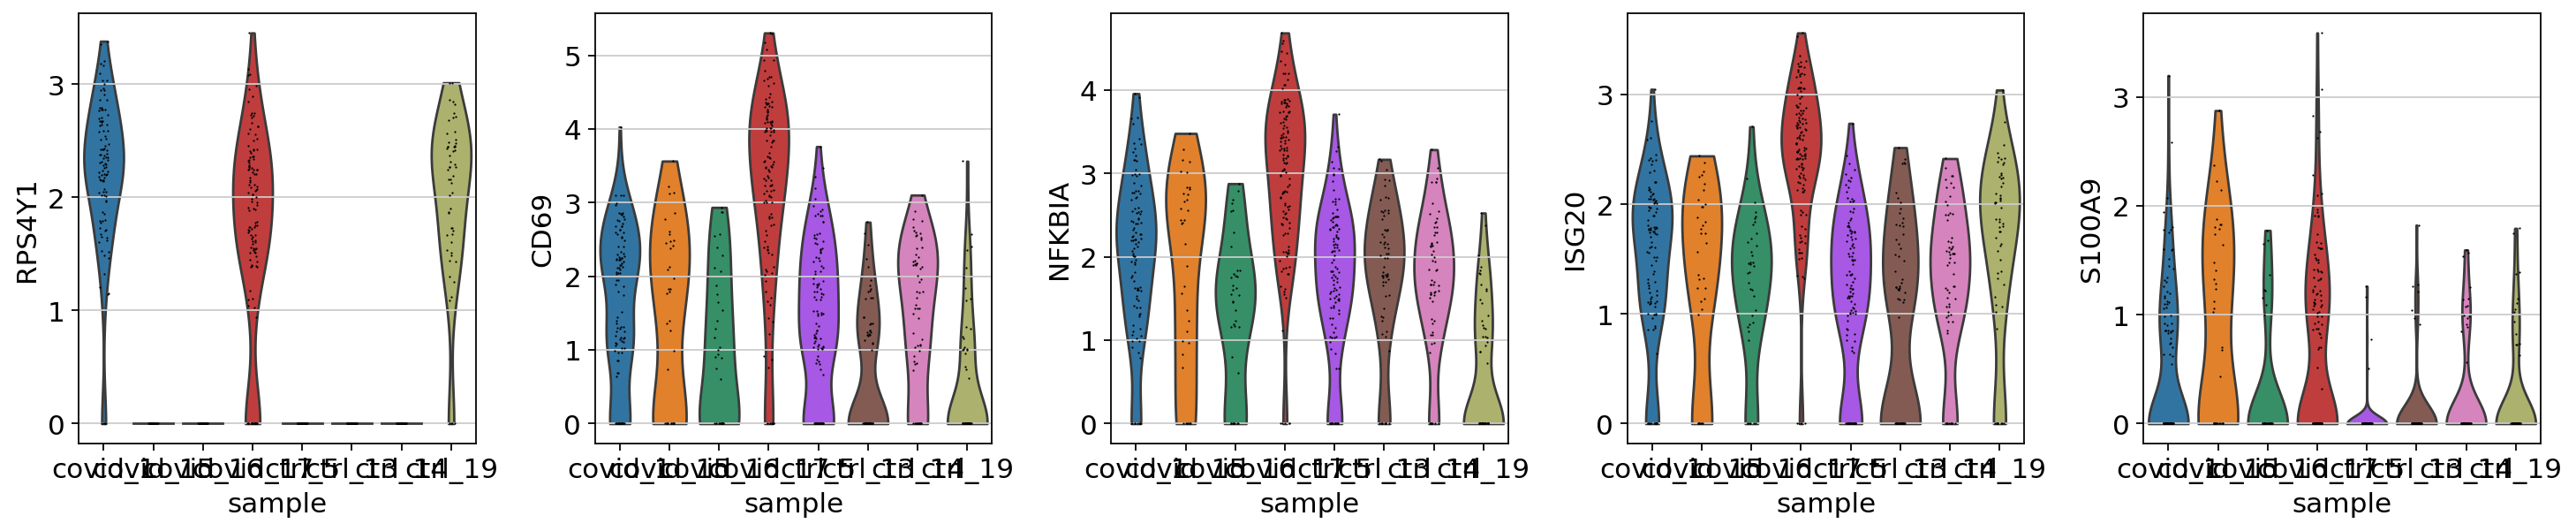

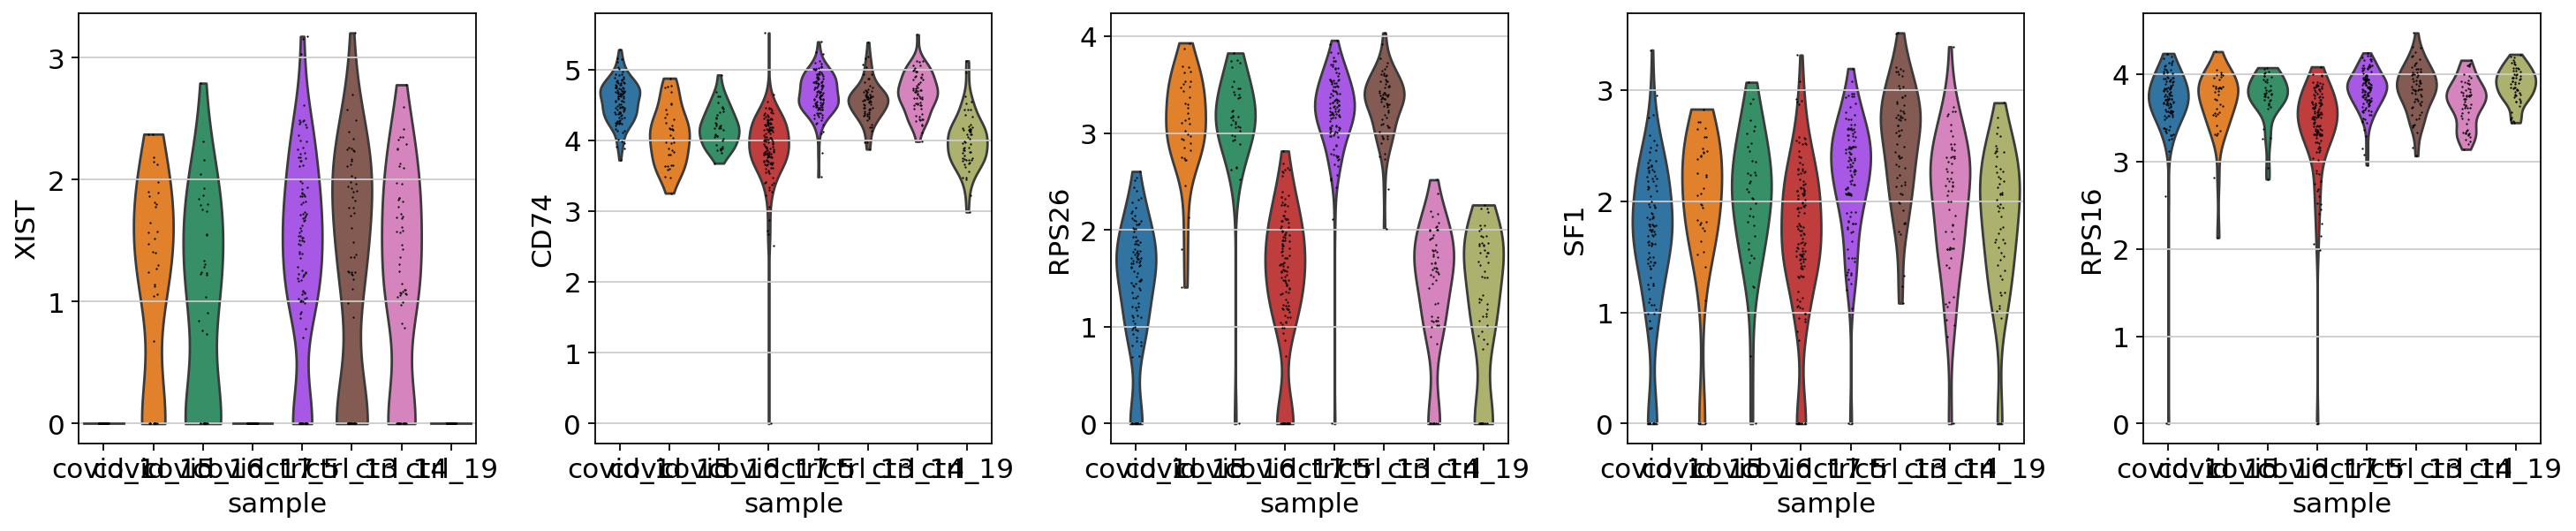

In [19]:
cl1 = adata[adata.obs['louvain_0.6'] == '4',:]
cl1.obs['type'].value_counts()
sc.tl.rank_genes_groups(cl1, 'type', method='wilcoxon', key_added = "wilcoxon")


genes1 = sc.get.rank_genes_groups_df(cl1, group='Covid', key='wilcoxon')['names'][:5]
genes2 = sc.get.rank_genes_groups_df(cl1, group='Ctrl', key='wilcoxon')['names'][:5]
genes = genes1.tolist() +  genes2.tolist() 

sc.pl.violin(cl1, genes1, groupby='sample')
sc.pl.violin(cl1, genes2, groupby='sample')

As you can see, many of the genes detected as DGE in Covid are unique to one or 2 patients.

We can also plot the top Covid and top Ctrl genes as a dotplot:

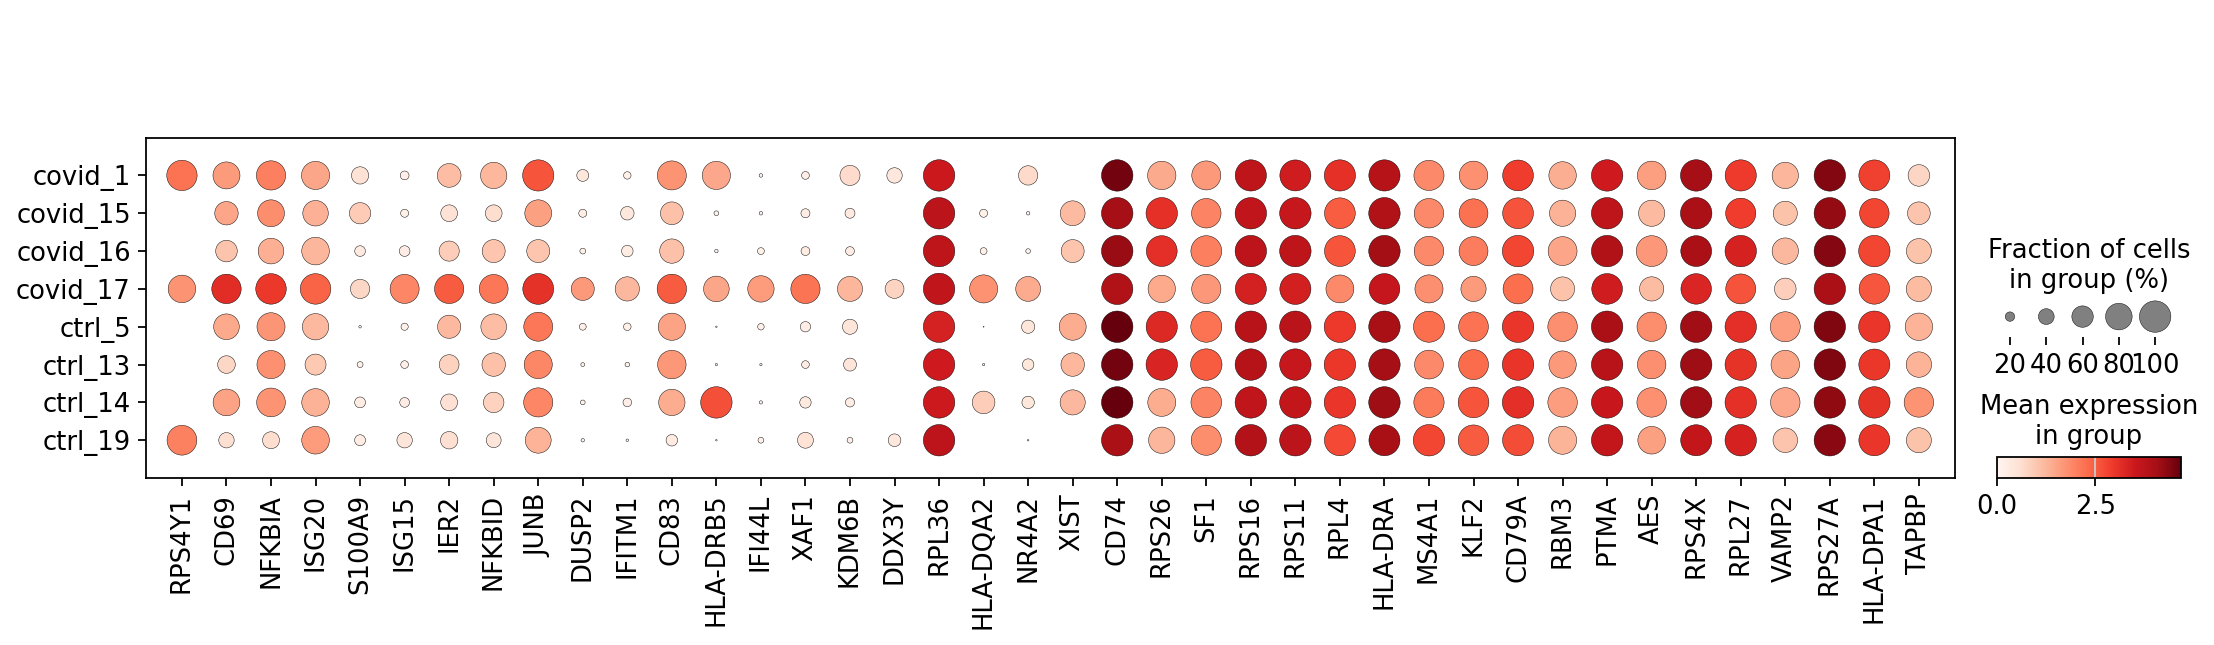

In [20]:
genes1 = sc.get.rank_genes_groups_df(cl1, group='Covid', key='wilcoxon')['names'][:20]
genes2 = sc.get.rank_genes_groups_df(cl1, group='Ctrl', key='wilcoxon')['names'][:20]
genes = genes1.tolist() +  genes2.tolist() 

sc.pl.dotplot(cl1,genes, groupby='sample')